In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from mlxtend.preprocessing import minmax_scaling

In [ ]:
df = pd.read_csv("new_data_no_missingvalues.csv")

In [ ]:
df.groupby('id')['average_mood'].rolling(3).mean()

id           
AS14.01  0            NaN
         1            NaN
         2       6.300000
         3       6.483333
         4       6.400000
                   ...   
AS14.33  1210    6.161111
         1211    6.016667
         1212    5.950000
         1213    6.600000
         1214    7.133333
Name: average_mood, Length: 1215, dtype: float64

In [ ]:
hoi = df.loc[df['id'] == 'AS14.01'].rolling(3).mean()

In [ ]:
list_ids = df.id.unique()

In [ ]:
def window_id(dataframe, window_size):
    list_window = []
    window1 = 1
    window2 = window_size

    for x,y in dataframe.iterrows():
        set1 = (window1, window2)
        list_window.append(set1)
        window1 += 1
        window2 += 1
    
    return list_window

In [ ]:
df_new = pd.DataFrame()  
for x in list_ids:
    window = df.loc[df['id'] == x].rolling(3).mean()
    wid = window_id(window, 3)
    window['window_size'] = wid
    lid = [x] * len(wid)
    window['id'] = lid
    h_list = []
    for i,j in window.iterrows():
        if j['window_size'][1]+1 < len(wid):
            h = window.iloc[j['window_size'][1] + 1]['average_mood']
            h_list.append(h)
        else:
            h_list.append(0)
    window['day_after'] = h_list
    
    df_new = df_new.append(window)

In [ ]:
df_new = df_new.iloc[2:]

In [ ]:
df_new = df_new.loc[df_new['day_after'] != 0]

In [ ]:
df_window = pd.read_csv("data_window_of_3_days.csv")

In [ ]:
df_window

,Unnamed: 0,Unnamed: 0.1,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game,window_size,id,day_after
0,2,1.0,6.300000,2.000000,0.000000,35.597530,6.483333,37.259222,0.549550,0.183333,4.406111,19.134000,33.228667,0.0,"(3, 5)",AS14.01,6.450000
1,3,2.0,6.483333,2.000000,0.000000,53.411540,6.400000,53.941426,0.566216,0.333333,8.023028,19.134000,43.711556,0.0,"(4, 6)",AS14.01,6.783333
2,4,3.0,6.400000,0.000000,0.000000,50.893593,6.516667,53.883553,0.499550,0.533333,7.853472,1.003333,66.744014,0.0,"(5, 7)",AS14.01,6.666667
3,5,4.0,6.516667,0.000000,0.000000,56.807075,6.450000,64.522398,0.433333,0.500000,9.099528,1.003333,62.557681,0.0,"(6, 8)",AS14.01,7.133333
4,6,5.0,6.450000,0.000000,0.000000,54.680243,6.783333,89.210095,0.366667,0.366667,8.389889,1.003333,95.430935,0.0,"(7, 9)",AS14.01,7.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1206,1205.0,6.150000,0.000000,0.000000,66.436490,6.000000,134.010736,0.393704,-0.455556,0.000000,0.000000,103.117067,0.0,"(31, 33)",AS14.33,6.161111
1101,1207,1206.0,6.000000,2.666667,0.000000,70.542827,5.861111,109.742962,0.410370,-0.222222,0.000000,0.000000,97.510511,0.0,"(32, 34)",AS14.33,6.016667
1102,1208,1207.0,5.861111,2.666667,0.000000,50.831061,5.994444,123.089888,0.243704,-0.333333,0.000000,0.000000,139.604378,0.0,"(33, 35)",AS14.33,5.950000
1103,1209,1208.0,5.994444,2.666667,0.000000,41.537724,6.161111,118.335189,0.243704,-0.210526,0.000000,0.000000,142.807230,0.0,"(34, 36)",AS14.33,6.600000


In [ ]:
df_window['average_valence'] = df_window['average_valence'].fillna(df_window.groupby('id')['average_valence'].transform('mean'))
df_window['average_arousal'] = df_window['average_arousal'].fillna(df_window.groupby('id')['average_arousal'].transform('mean'))

In [ ]:
df_window

,Unnamed: 0,Unnamed: 0.1,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game,window_size,id,day_after
0,2,1.0,6.300000,2.000000,0.000000,35.597530,6.483333,37.259222,0.549550,0.183333,4.406111,19.134000,33.228667,0.0,"(3, 5)",AS14.01,6.450000
1,3,2.0,6.483333,2.000000,0.000000,53.411540,6.400000,53.941426,0.566216,0.333333,8.023028,19.134000,43.711556,0.0,"(4, 6)",AS14.01,6.783333
2,4,3.0,6.400000,0.000000,0.000000,50.893593,6.516667,53.883553,0.499550,0.533333,7.853472,1.003333,66.744014,0.0,"(5, 7)",AS14.01,6.666667
3,5,4.0,6.516667,0.000000,0.000000,56.807075,6.450000,64.522398,0.433333,0.500000,9.099528,1.003333,62.557681,0.0,"(6, 8)",AS14.01,7.133333
4,6,5.0,6.450000,0.000000,0.000000,54.680243,6.783333,89.210095,0.366667,0.366667,8.389889,1.003333,95.430935,0.0,"(7, 9)",AS14.01,7.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1206,1205.0,6.150000,0.000000,0.000000,66.436490,6.000000,134.010736,0.393704,-0.455556,0.000000,0.000000,103.117067,0.0,"(31, 33)",AS14.33,6.161111
1101,1207,1206.0,6.000000,2.666667,0.000000,70.542827,5.861111,109.742962,0.410370,-0.222222,0.000000,0.000000,97.510511,0.0,"(32, 34)",AS14.33,6.016667
1102,1208,1207.0,5.861111,2.666667,0.000000,50.831061,5.994444,123.089888,0.243704,-0.333333,0.000000,0.000000,139.604378,0.0,"(33, 35)",AS14.33,5.950000
1103,1209,1208.0,5.994444,2.666667,0.000000,41.537724,6.161111,118.335189,0.243704,-0.210526,0.000000,0.000000,142.807230,0.0,"(34, 36)",AS14.33,6.600000


In [ ]:
df_window['total_calls'] = df_window['total_calls'].replace(np.nan, 0)
df_window['total_sms'] = df_window['total_sms'].replace(np.nan, 0)
df_window['average_com'] = df_window['average_com'].replace(np.nan, 0)
df_window['average_soc'] = df_window['average_soc'].replace(np.nan, 0)
df_window['average_finance'] = df_window['average_finance'].replace(np.nan, 0)
df_window['average_entertainment'] = df_window['average_entertainment'].replace(np.nan, 0)
df_window['average_office'] = df_window['average_office'].replace(np.nan, 0)
df_window['average_game'] = df_window['average_game'].replace(np.nan, 0)

In [ ]:
df_window

,Unnamed: 0,Unnamed: 0.1,average_mood,total_calls,total_sms,average_com,mood_next_day,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game,window_size,id,day_after
0,2,1.0,6.300000,2.000000,0.000000,35.597530,6.483333,37.259222,0.549550,0.183333,4.406111,19.134000,33.228667,0.0,"(3, 5)",AS14.01,6.450000
1,3,2.0,6.483333,2.000000,0.000000,53.411540,6.400000,53.941426,0.566216,0.333333,8.023028,19.134000,43.711556,0.0,"(4, 6)",AS14.01,6.783333
2,4,3.0,6.400000,0.000000,0.000000,50.893593,6.516667,53.883553,0.499550,0.533333,7.853472,1.003333,66.744014,0.0,"(5, 7)",AS14.01,6.666667
3,5,4.0,6.516667,0.000000,0.000000,56.807075,6.450000,64.522398,0.433333,0.500000,9.099528,1.003333,62.557681,0.0,"(6, 8)",AS14.01,7.133333
4,6,5.0,6.450000,0.000000,0.000000,54.680243,6.783333,89.210095,0.366667,0.366667,8.389889,1.003333,95.430935,0.0,"(7, 9)",AS14.01,7.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,1206,1205.0,6.150000,0.000000,0.000000,66.436490,6.000000,134.010736,0.393704,-0.455556,0.000000,0.000000,103.117067,0.0,"(31, 33)",AS14.33,6.161111
1101,1207,1206.0,6.000000,2.666667,0.000000,70.542827,5.861111,109.742962,0.410370,-0.222222,0.000000,0.000000,97.510511,0.0,"(32, 34)",AS14.33,6.016667
1102,1208,1207.0,5.861111,2.666667,0.000000,50.831061,5.994444,123.089888,0.243704,-0.333333,0.000000,0.000000,139.604378,0.0,"(33, 35)",AS14.33,5.950000
1103,1209,1208.0,5.994444,2.666667,0.000000,41.537724,6.161111,118.335189,0.243704,-0.210526,0.000000,0.000000,142.807230,0.0,"(34, 36)",AS14.33,6.600000


In [ ]:
dfp = df.drop(["average_mood", "Unnamed: 0.1", "Unnamed: 0", 'mood_next_day', 'id', 'window_size'], axis=1)

In [ ]:
dfp

,total_calls,total_sms,average_com,average_soc,average_valence,average_arousal,average_finance,average_office,average_entertainment,average_game,window_size,id,day_after
0,2.000000,0.000000,35.597530,37.259222,0.549550,0.183333,4.406111,19.134000,33.228667,0.0,"(3, 5)",AS14.01,6.450000
1,2.000000,0.000000,53.411540,53.941426,0.566216,0.333333,8.023028,19.134000,43.711556,0.0,"(4, 6)",AS14.01,6.783333
2,0.000000,0.000000,50.893593,53.883553,0.499550,0.533333,7.853472,1.003333,66.744014,0.0,"(5, 7)",AS14.01,6.666667
3,0.000000,0.000000,56.807075,64.522398,0.433333,0.500000,9.099528,1.003333,62.557681,0.0,"(6, 8)",AS14.01,7.133333
4,0.000000,0.000000,54.680243,89.210095,0.366667,0.366667,8.389889,1.003333,95.430935,0.0,"(7, 9)",AS14.01,7.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,0.000000,0.000000,66.436490,134.010736,0.393704,-0.455556,0.000000,0.000000,103.117067,0.0,"(31, 33)",AS14.33,6.161111
1101,2.666667,0.000000,70.542827,109.742962,0.410370,-0.222222,0.000000,0.000000,97.510511,0.0,"(32, 34)",AS14.33,6.016667
1102,2.666667,0.000000,50.831061,123.089888,0.243704,-0.333333,0.000000,0.000000,139.604378,0.0,"(33, 35)",AS14.33,5.950000
1103,2.666667,0.000000,41.537724,118.335189,0.243704,-0.210526,0.000000,0.000000,142.807230,0.0,"(34, 36)",AS14.33,6.600000


In [ ]:
corr_ = dfp.corr()

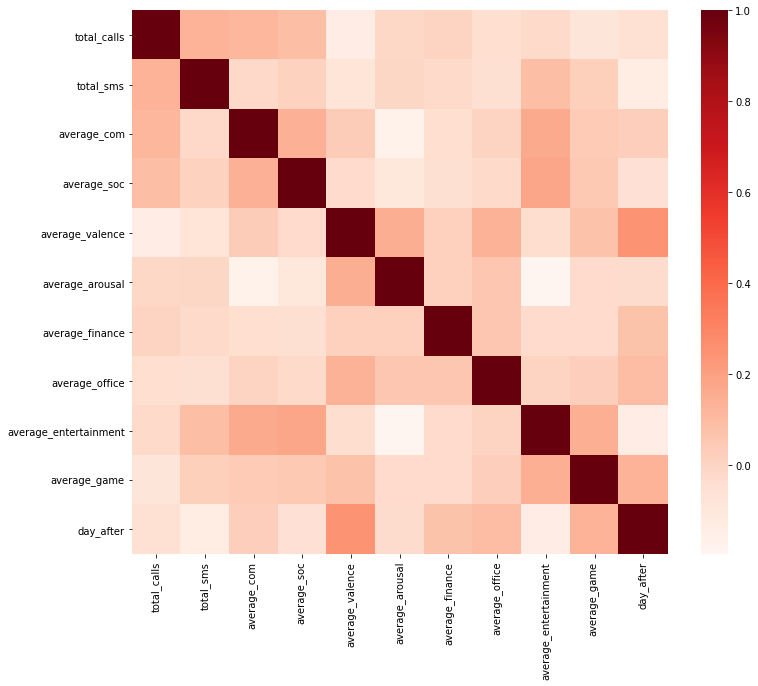

In [ ]:
try:
    plt.figure(figsize=(12,10))
    sns.heatmap(corr_, # annot=True, # Annotations will take an incredibly long time... better to leave them off
    cmap=plt.cm.Reds)
    plt.show()
except Exception as exc:
    print(f"While working without supervision...\nEncountered {exc}")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d79defa5-2359-4699-82dc-d6bf5eddd7a7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>